In [17]:
pd.options.display.max_rows = 9999
pd.options.display.max_columns = 9999

import re
import sys
import missingno as msno
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from PIL import Image
from functools import reduce
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

mod = sys.modules[__name__]
%matplotlib inline
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False


In [74]:
!pip instal -U pandas-profiling

ERROR: unknown command "instal" - maybe you meant "install"


In [18]:
df_credit_2020 = pd.read_excel("2020_credit_rating.xlsx")

In [19]:
credit_dlist={"D":0,"C-":1,"C":2,"C+":3,"CC-":4,"CC":5,"CC+":6,"CCC-":7,"CCC":8,"CCC+":9,
              "B-":10,"B":11,"B+":12,"BB-":13,"BB":14,"BB+":15,"BBB-":16,"BBB":17,"BBB+":18,
              "A-":19,"A":20,"A+":21,"AA-":22,"AA":23,"AA+":24,"AAA-":25,"AAA":26,"AAA+":27}

def screen_name(df):
    df = df.rename(columns = {"평가대상회사":"기업명"})
    df = df[["기업명","공시일자","평가등급"]]
    df["공시일자"] = df["공시일자"].apply(lambda x: int(str(x)[:4]))
    df["평가등급"][df["평가등급"] == "취소"] = np.nan
    df["기업명"] = df["기업명"].apply(lambda x: str(x).replace("(주)",""))
    df = df.dropna()
    df = df.drop_duplicates(['기업명'],keep="last").reset_index(drop=True)
    df['평가등급'] = df['평가등급'].apply(credit_dlist.get)
    return df

In [20]:
#기업 신용평가 점수(2017~2020) 데이터를 부르고 위 함수를 적용합니다
credit_ls_2017_2020= ["2017_credit_rating.xlsx","2018_credit_rating.xlsx",
            "2019_credit_rating.xlsx","2020_credit_rating.xlsx"]
    
for a in credit_ls_2017_2020:
    regex = re.compile(r'\d\d\d\d')
    b = regex.search(a).group() 
    setattr(mod, 'df_credit_{}'.format(b), screen_name(pd.read_excel(a)))

# df_credit_2017,df_credit_2018,df_credit_2019,df_credit_2020

/Users/yeonghwanchoi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [21]:
#2013년 부터 2016년까지 신용평가 점수 데이터를 불러오고 각 년도에 맞게 데이터프레임을 분활합니다
# def credit_2013_2016(a="2013-2016_credit_rating.xlsx"):
df_2013_2016_credit = pd.read_excel("2013-2016_credit_rating.xlsx")
df_2013_2016_credit.columns = ["Unnamed", "평가회사","기업명","평가","평가대상종류","공시일자","평가등급","등급감시","등급전망"]
df_2013_2016_credit["공시일자"] = df_2013_2016_credit["공시일자"].apply(lambda x: int(str(x)[:4]))



/Users/yeonghwanchoi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [22]:
# ["df_credit_{}".format(i) for i in range(2013,2021)]

In [23]:
# ["df_credit_{}".format(i) for i in range(2014,2021)]

# 2개년도 변화에 따른 포인트 부여 부분 코드 

In [24]:
def give_point(df1, df2): 
    df_n = pd.merge(df1, df2, on = "기업명", how = "inner").dropna()
    df_n["Point"] = df_n["평가등급_x"] - df_n["평가등급_y"]
    df_n["Point"][df_n["Point"].values != 0] =1
    df_n = pd.merge(df_n, df_credit_2014, on = "기업명", how="inner")
    return df_n[["기업명","Point"]]

In [29]:
df_2014 = give_point(df_credit_2013,df_credit_2014)
df_2015 = give_point(df_credit_2014,df_credit_2015)
df_2016 = give_point(df_credit_2015,df_credit_2016)
df_2017 = give_point(df_credit_2016,df_credit_2017)
df_2018 = give_point(df_credit_2017,df_credit_2018)
df_2019 = give_point(df_credit_2018,df_credit_2019)
df_2020 = give_point(df_credit_2019,df_credit_2020)

/Users/yeonghwanchoi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [30]:
df_credit_2014 = df_2014
df_credit_2015 = df_2015
df_credit_2016 = df_2016
df_credit_2017 = df_2017
df_credit_2018 = df_2018
df_credit_2019 = df_2019
df_credit_2020 = df_2020

In [31]:
df_esg = pd.read_csv("2011-2019-ESG.tsv", sep='\t')
df_esg.head()

,NO,기업명,기업코드,ESG등급,지배구조,사회,환경,평가년도,비고
0,6567,AJ네트웍스,95570,B,B,B,C이하,2019,NaN
1,6566,AJ렌터카,68400,C이하,C,B,B,2019,NaN
2,6565,AK홀딩스,6840,B,B,B,C이하,2019,NaN
3,6564,AP시스템,265520,C이하,B,C이하,C이하,2019,NaN
4,6563,BGF,27410,B,B,A,C이하,2019,NaN


# 기업코드 6자리로 앞자리 "0"부여하고 ESG등급 숫자 치환

In [32]:
df_esg = df_esg.drop(['NO', '비고'], axis=1).dropna()
df_esg["기업코드"] = df_esg["기업코드"].astype(str)
df_esg.기업코드 = df_esg.기업코드.apply(lambda x: x.zfill(6))
df_esg.기업코드

0       095570
1       068400
2       006840
3       265520
4       027410
5       282330
6       138930
7       001460
8       001040
9       079160
10      035760
11      000120
12      011150
13      097950
14      051500
15      037560
16      058820
17      000590
18      012030
19      016610
21      005830
22      000990
23      139130
25      004840
26      155660
27      069730
28      017940
29      007700
30      114090
31      078930
32      006360
33      001250
34      007070
35      028150
36      012630
37      039570
38      089470
39      082740
40      175330
41      234080
42      001060
43      096760
44      035900
46      105560
51      021320
52      009440
53      119650
54      092220
55      035600
56      001390
57      001940
58      025000
59      092230
60      000040
61      044450
62      030210
63      036030
64      058850
65      058860
66      060370
67      093050
68      003550
69      034220
70      001120
71      051900
72      032640
73      01

In [33]:
#esg 데이터를 정수화 합니다

di = {"S":70.0,"A+":60.0,"A":50.0,"B+":40.0,"B":30.0,"B이하":30.0,"C":20.0,"C이하":20.0,"D":10.0}
esg = map(di.get, df_esg.ESG등급)
e = map(di.get, df_esg.지배구조)
s = map(di.get, df_esg.ESG등급)
g = map(di.get, df_esg.ESG등급)
df_esg.ESG등급 = list(esg)
df_esg.지배구조 = list(e)
df_esg.사회 = list(s)
df_esg.환경 = list(g)

In [34]:
df_esg.head()

,기업명,기업코드,ESG등급,지배구조,사회,환경,평가년도
0,AJ네트웍스,095570,30.0,30.0,30.0,30.0,2019
1,AJ렌터카,068400,20.0,20.0,20.0,20.0,2019
2,AK홀딩스,006840,30.0,30.0,30.0,30.0,2019
3,AP시스템,265520,20.0,30.0,20.0,20.0,2019
4,BGF,027410,30.0,30.0,30.0,30.0,2019


<Figure size 7200x7200 with 0 Axes>

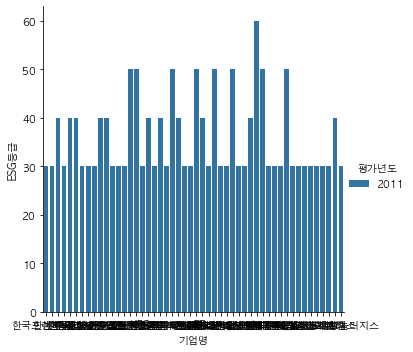

In [35]:
import seaborn as sns
plt.figure(figsize=(100,100))
sns.catplot(x="기업명", y="ESG등급",
                hue="평가년도",
                data=df_esg.tail(50), kind="bar")

In [36]:
#esg 평가데이터를 평가년도에 맞게 각 데이터 프레임으로 분활해 줍니다
for i in range(2011,2020):
    setattr(mod, 'df_esg_{}'.format(i),df_esg[df_esg["평가년도"]==i])

In [37]:
#기업들의 년도별 각 계정과목들을 변수로 만들어줍니다
df_f = ["당기순이익.xlsx","자산총계.xlsx","매출액.xlsx","재고자산.xlsx","유보액_총자산.xlsx","비유동부채.xlsx","유동부채.xlsx","유동자산.xlsx"]

def change_columns(df):
    columns = ["종목코드","기업명","결산월","단위","2019","2018","2017","2016","2015","2014","2013","2012","2011","2010","2009","2008"]
    df.columns = columns
    df = df.rename(columns = {"종목코드":"기업코드"})
    return df

for i in range(1,9):
    setattr(mod, 'df_balance_{}'.format(i), change_columns(pd.read_excel(df_f[i-1])[9:]))
    

<Figure size 3600x5040 with 0 Axes>

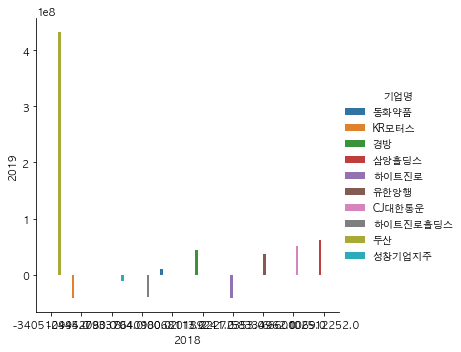

In [38]:
plt.figure(figsize=(50,70))
sns.catplot(x="2018", y="2019",
                hue="기업명",
                data=df_balance_1.head(10), kind="bar")

In [39]:
list_credit = [df_credit_2013,df_credit_2014,df_credit_2015,df_credit_2016,df_credit_2017,
             df_credit_2018,df_credit_2019]

list_esg = [df_esg_2011,df_esg_2012,df_esg_2013,df_esg_2014,df_esg_2015,df_esg_2016,
            df_esg_2017,df_esg_2018,df_esg_2019]

list_balance = [df_balance_1,df_balance_2,df_balance_3,df_balance_4,df_balance_5,
               df_balance_6,df_balance_7,df_balance_8,]

In [48]:
#기업명만 있는 신용평가 데이터를 ESG데이터에 기업명이 같은 데이터로만 병합를 시킵니다
def merge_code(dfa,dfb):
    dfb = dfb[["기업코드","기업명"]][dfb["기업명"].isin(dfa["기업명"])]
    dfa = pd.merge(dfa,dfb, on="기업명",how="inner")
    return dfa

for i in range(2013,2020):
    setattr(mod, 'df_rating_{}'.format(i), merge_code(list_credit[i-2013],list_esg[i-2013]))

# 그 후 각 년도별 계정 데이터프레임에 있는 기업들 중 신용평가 점수와 esg점수가 있는 기업별로 묶어줍니다

for k in range(2011, 2020):
    for i in range(1,9):
        setattr(mod, 'df_{}_{}'.format(k,i), pd.DataFrame(list_balance[i-1].iloc[:,[0,2023-k]]))
        


In [49]:
df_columns = ["기업코드","당기순이익","자산총계","매출액","재고자산","유보액_총자산","비유동부채","유동부채","유동자산"]

망작

In [50]:
# class merger:
    
#       # 생성자 함수 : __init__
#     def __init__(self, num):
#         self.num1 = num
#         data_frames_2011 = [df_2011_1,df_2011_2,df_2011_3,df_2011_4,df_2011_5,df_2011_6,df_2011_7,df_2011_8,]
#         data_frames_2012 = [df_2012_1,df_2012_2,df_2012_3,df_2012_4,df_2012_5,df_2012_6,df_2012_7,df_2012_8,]
#         data_frames_2013 = [df_2013_1,df_2013_2,df_2013_3,df_2013_4,df_2013_5,df_2013_6,df_2013_7,df_2013_8,]
#         data_frames_2014 = [df_2014_1,df_2014_2,df_2014_3,df_2014_4,df_2014_5,df_2014_6,df_2014_7,df_2014_8,]
#         data_frames_2015 = [df_2015_1,df_2015_2,df_2015_3,df_2015_4,df_2015_5,df_2015_6,df_2015_7,df_2015_8,]
#         data_frames_2016 = [df_2016_1,df_2016_2,df_2016_3,df_2016_4,df_2016_5,df_2016_6,df_2016_7,df_2016_8,]
#         data_frames_2017 = [df_2017_1,df_2017_2,df_2017_3,df_2017_4,df_2017_5,df_2017_6,df_2017_7,df_2017_8,]
#         data_frames_2018 = [df_2018_1,df_2018_2,df_2018_3,df_2018_4,df_2018_5,df_2018_6,df_2018_7,df_2018_8,]
#         data_frames_2019 = [df_2019_1,df_2019_2,df_2019_3,df_2019_4,df_2019_5,df_2019_6,df_2019_7,df_2019_8,]
       
#     def merge(num):    
#         setattr(mod, 'df_merged_{}'.format(num),reduce(lambda left,right: pd.merge(left,right,on=['기업코드'], how='inner'), data_frame_list[num-2011]).dropna())
  

In [52]:


data_frames_2011 = [df_2011_1,df_2011_2,df_2011_3,df_2011_4,df_2011_5,df_2011_6,df_2011_7,df_2011_8,]#df_2011_9,df_2011_10,df_2011_11,]
df_merged_2011 = reduce(lambda left,right: pd.merge(left,right,on=['기업코드'], how='inner'), data_frames_2011).dropna()
df_merged_2011.columns = df_columns


data_frames_2012 = [df_2012_1,df_2012_2,df_2012_3,df_2012_4,df_2012_5,df_2012_6,df_2012_7,df_2012_8,]#df_2012_9,df_2012_10,df_2012_11,]
df_merged_2012 = reduce(lambda left,right: pd.merge(left,right,on=['기업코드'], how='inner'), data_frames_2012).dropna()
df_merged_2012.columns = df_columns

data_frames_2013 = [df_2013_1,df_2013_2,df_2013_3,df_2013_4,df_2013_5,df_2013_6,df_2013_7,df_2013_8,]#df_2013_9,df_2013_10,df_2013_11,]
df_merged_2013 = reduce(lambda left,right: pd.merge(left,right,on=['기업코드'], how='inner'), data_frames_2013).dropna()
df_merged_2013.columns = df_columns

data_frames_2014 = [df_2014_1,df_2014_2,df_2014_3,df_2014_4,df_2014_5,df_2014_6,df_2014_7,df_2014_8,]#df_2014_9,df_2014_10,df_2014_11,]
df_merged_2014 = reduce(lambda left,right: pd.merge(left,right,on=['기업코드'], how='inner'), data_frames_2014).dropna()
df_merged_2014.columns = df_columns

data_frames_2015 = [df_2015_1,df_2015_2,df_2015_3,df_2015_4,df_2015_5,df_2015_6,df_2015_7,df_2015_8,]#df_2015_9,df_2015_10,df_2015_11,]
df_merged_2015 = reduce(lambda left,right: pd.merge(left,right,on=['기업코드'], how='inner'), data_frames_2015).dropna()
df_merged_2015.columns = df_columns

data_frames_2016 = [df_2016_1,df_2016_2,df_2016_3,df_2016_4,df_2016_5,df_2016_6,df_2016_7,df_2016_8,]#df_2016_9,df_2016_10,df_2016_11,]
df_merged_2016 = reduce(lambda left,right: pd.merge(left,right,on=['기업코드'], how='inner'), data_frames_2016).dropna()
df_merged_2016.columns = df_columns

data_frames_2017 = [df_2017_1,df_2017_2,df_2017_3,df_2017_4,df_2017_5,df_2017_6,df_2017_7,df_2017_8,]#df_2017_9,df_2017_10,df_2017_11,]
df_merged_2017 = reduce(lambda left,right: pd.merge(left,right,on=['기업코드'], how='inner'), data_frames_2017).dropna()
df_merged_2017.columns = df_columns

data_frames_2018 = [df_2018_1,df_2018_2,df_2018_3,df_2018_4,df_2018_5,df_2018_6,df_2018_7,df_2018_8,]#df_2018_9,df_2018_10,df_2018_11,]
df_merged_2018 = reduce(lambda left,right: pd.merge(left,right,on=['기업코드'], how='inner'), data_frames_2018).dropna()
df_merged_2018.columns = df_columns

data_frames_2019 = [df_2019_1,df_2019_2,df_2019_3,df_2019_4,df_2019_5,df_2019_6,df_2019_7,df_2019_8,]#df_2019_9,df_2019_10,df_2019_11,]
df_merged_2019 = reduce(lambda left,right: pd.merge(left,right,on=['기업코드'], how='inner'), data_frames_2019).dropna()
df_merged_2019.columns = df_columns

In [53]:
df_merged_2019.tail()

,기업코드,당기순이익,자산총계,매출액,재고자산,유보액_총자산,비유동부채,유동부채,유동자산
2126,900340,10227321.0,126212171.0,111593709.0,7172142.0,53.30,2593268.0,23470745.0,104820755.0
2128,950130,-20656016.0,69730399.0,43058688.0,8095298.0,39.46,24086655.0,17743727.0,25912635.0
2129,950140,2268541.0,115343361.0,133316920.0,29603554.0,48.01,15721100.0,38497196.0,70525502.0
2130,950160,-49270012.0,124536732.0,3053313.0,533368.0,75.13,16975346.0,13999851.0,112794308.0
2132,950180,31169202.0,320988517.0,102069412.0,648030.0,60.59,3164597.0,14232095.0,305367430.0


In [54]:
df_merged_2019.describe()

,당기순이익,자산총계,매출액,재고자산,유보액_총자산,비유동부채,유동부채,유동자산
count,1.954000e+03,1.954000e+03,1.954000e+03,1.954000e+03,1954.000000,1.954000e+03,1.954000e+03,1.954000e+03
mean,3.061505e+07,1.683793e+09,1.180229e+09,1.349468e+08,48.191024,3.673680e+08,4.376288e+08,5.994090e+08
std,5.219862e+08,1.223711e+10,7.426690e+09,8.655701e+08,23.335966,3.256970e+09,2.522146e+09,4.700556e+09
min,-2.872078e+09,3.556689e+06,3.581100e+04,4.000000e+02,0.420000,9.179000e+03,2.307210e+05,6.244020e+05
25%,-3.007749e+06,8.034788e+07,4.840280e+07,4.889068e+06,30.517500,3.830870e+06,1.788911e+07,3.902832e+07
50%,2.876534e+06,1.725496e+08,1.332599e+08,1.581332e+07,46.810000,1.344515e+07,4.759400e+07,8.325042e+07
75%,1.459635e+07,4.830802e+08,3.969356e+08,4.915218e+07,66.372500,4.939242e+07,1.468176e+08,2.201555e+08
max,2.173886e+10,3.525645e+11,2.304009e+11,2.676646e+10,130.190000,1.044765e+11,6.378276e+10,1.813853e+11


In [56]:
df_m = pd.read_excel("매출채권회전율.xlsx").rename(columns={"name":"기업명"})
df_m["매출채권회전율"] = df_m["매출채권회전율"].apply(lambda x : np.reciprocal(x))
for i in range(2011,2020):
        setattr(mod, 'df_m_{}'.format(i), df_m[df_m["DATE"]==i].replace("(주)","").dropna())
df_m_2011.head()

,Unnamed: 0,기업명,DATE,매출채권회전율
9,0,강남제비스코,2011,0.202332
18,0,강원랜드,2011,0.003415
45,0,경동나비엔,2011,0.091347
58,0,경동인베스트,2011,0.156648
67,0,경방,2011,0.091764


In [57]:
m_list = [df_m_2011, df_m_2012, df_m_2013, df_m_2014, df_m_2015, df_m_2016, df_m_2017, df_m_2018, df_m_2019,]

In [58]:
for i in range(2011,2020):
        setattr(mod, 'df_m_{}'.format(i), pd.merge(m_list[i-2011], df_balance_2, on="기업명", how="inner").drop_duplicates(['기업명'],keep="last").reset_index(drop=True).iloc[:,3:5] )

In [59]:
merged_list = [df_merged_2011,df_merged_2012,df_merged_2013,df_merged_2014,df_merged_2015,df_merged_2016,df_merged_2017,df_merged_2018,df_merged_2019]

In [60]:
m_list = [df_m_2011, df_m_2012, df_m_2013, df_m_2014, df_m_2015, df_m_2016, df_m_2017, df_m_2018, df_m_2019,]

In [61]:
for i in range(2011,2020):
        setattr(mod, 'df_merged_{}'.format(i), pd.merge(m_list[i-2011], merged_list[i-2011], on='기업코드', how='inner'))

In [62]:
list(df_merged_2011.columns)

['매출채권회전율',
 '기업코드',
 '당기순이익',
 '자산총계',
 '매출액',
 '재고자산',
 '유보액_총자산',
 '비유동부채',
 '유동부채',
 '유동자산']

In [63]:
def test(df) :
    df["부채총계"] = df["유동부채"] + df["비유동부채"]
    df["운전자본"] = df_merged_2011["유동자산"] - df["유동부채"]
    df["당기순이익_총자산"] = df["당기순이익"] / df["자산총계"]
    df["부채총계_총자산"] = df["부채총계"] / df["자산총계"]
    df["운전자본_총자산"] = df["운전자본"] / df["자산총계"]
    df["유동자산_총자산"] = df["유동자산"] / df["자산총계"]
    df["매출액_총자산"] = df["매출액"] / df["자산총계"]
    df["재고자산_총자산"] = df["재고자산"] / df["자산총계"]
    df["매출채권_총자산"] = (df["매출채권회전율"] * df["매출액"])/ df["자산총계"]
    return df

def test2 ():
    for df in df_ls:
        test(df)

In [64]:
df_merged_2019.head()

,매출채권회전율,기업코드,당기순이익,자산총계,매출액,재고자산,유보액_총자산,비유동부채,유동부채,유동자산
0,0.208766,000500,5462904.0,5.125735e+08,8.302644e+08,57086106.0,46.32,87775296.0,168070024.0,2.647750e+08
1,0.201614,000860,17412514.0,6.722703e+08,3.325394e+08,50810941.0,77.37,51175758.0,59914686.0,1.787881e+08
2,0.005801,035250,334653892.0,4.438119e+09,1.520080e+09,3636529.0,85.28,69017623.0,651342607.0,1.878191e+09
3,0.110829,002100,4014664.0,3.708741e+08,2.275109e+08,133714688.0,48.22,46380814.0,122608005.0,1.850201e+08
4,0.123546,009450,27852090.0,6.098083e+08,7.742907e+08,138114361.0,47.35,38512178.0,270253541.0,2.742792e+08


In [65]:
data_frames_a_2011 = [df_merged_2011,df_esg_2011]
df_merged_b_2011 = reduce(lambda left,right: pd.merge(left,right,on=['기업코드'], how='inner'), data_frames_a_2011).dropna()

data_frames_a_2012 = [df_merged_2012,df_esg_2012]
df_merged_b_2012 = reduce(lambda left,right: pd.merge(left,right,on=['기업코드'], how='inner'), data_frames_a_2012).dropna()

data_frames_a_2013 = [df_merged_2013,df_esg_2013]
df_merged_b_2013 = reduce(lambda left,right: pd.merge(left,right,on=['기업코드'], how='inner'), data_frames_a_2013).dropna()

data_frames_a_2014 = [df_merged_2014,df_esg_2014]
df_merged_b_2014 = reduce(lambda left,right: pd.merge(left,right,on=['기업코드'], how='inner'), data_frames_a_2014).dropna()

data_frames_a_2015 = [df_merged_2015,df_esg_2015]
df_merged_b_2015 = reduce(lambda left,right: pd.merge(left,right,on=['기업코드'], how='inner'), data_frames_a_2015).dropna()

data_frames_a_2016 = [df_merged_2016,df_esg_2016]
df_merged_b_2016 = reduce(lambda left,right: pd.merge(left,right,on=['기업코드'], how='inner'), data_frames_a_2016).dropna()

data_frames_a_2017 = [df_merged_2017,df_esg_2017]
df_merged_b_2017 = reduce(lambda left,right: pd.merge(left,right,on=['기업코드'], how='inner'), data_frames_a_2017).dropna()

data_frames_a_2018 = [df_merged_2018,df_esg_2018]
df_merged_b_2018 = reduce(lambda left,right: pd.merge(left,right,on=['기업코드'], how='inner'), data_frames_a_2018).dropna()

data_frames_a_2019 = [df_merged_2019,df_esg_2019]
df_merged_b_2019 = reduce(lambda left,right: pd.merge(left,right,on=['기업코드'], how='inner'), data_frames_a_2019).dropna()

In [66]:
df_merged_b_2019.head()

,매출채권회전율,기업코드,당기순이익,자산총계,매출액,재고자산,유보액_총자산,비유동부채,유동부채,유동자산,기업명,ESG등급,지배구조,사회,환경,평가년도
0,0.208766,000500,5462904.0,5.125735e+08,8.302644e+08,57086106.0,46.32,87775296.0,168070024.0,2.647750e+08,가온전선,30.0,40.0,30.0,30.0,2019
1,0.201614,000860,17412514.0,6.722703e+08,3.325394e+08,50810941.0,77.37,51175758.0,59914686.0,1.787881e+08,강남제비스코,20.0,30.0,20.0,20.0,2019
2,0.005801,035250,334653892.0,4.438119e+09,1.520080e+09,3636529.0,85.28,69017623.0,651342607.0,1.878191e+09,강원랜드,40.0,30.0,40.0,40.0,2019
3,0.110829,002100,4014664.0,3.708741e+08,2.275109e+08,133714688.0,48.22,46380814.0,122608005.0,1.850201e+08,경농,20.0,20.0,20.0,20.0,2019
4,0.123546,009450,27852090.0,6.098083e+08,7.742907e+08,138114361.0,47.35,38512178.0,270253541.0,2.742792e+08,경동나비엔,40.0,30.0,40.0,40.0,2019


In [71]:
# def change_columns(a):
#     a=a.iloc[:,[1,6,12,13,14,15,16,17,18,20,21,22,23]]


df_merged_b_2011 = df_merged_b_2011.iloc[:,[1,6,12,13,14,15,16,17,18,20,21,22,23]]#.rename(columns={"자산총계":"자산총계"})
df_merged_b_2012 = df_merged_b_2012.iloc[:,[1,6,12,13,14,15,16,17,18,20,21,22,23]]#.rename(columns={"자산총계":"자산총계"})
df_merged_b_2013 = df_merged_b_2013.iloc[:,[1,6,12,13,14,15,16,17,18,20,21,22,23]]#.rename(columns={"자산총계":"자산총계"})
df_merged_b_2014 = df_merged_b_2014.iloc[:,[1,6,12,13,14,15,16,17,18,20,21,22,23]]#.rename(columns={"자산총계":"자산총계"})
df_merged_b_2015 = df_merged_b_2015.iloc[:,[1,6,12,13,14,15,16,17,18,20,21,22,23]]#.rename(columns={"자산총계":"자산총계"})
df_merged_b_2016 = df_merged_b_2016.iloc[:,[1,6,12,13,14,15,16,17,18,20,21,22,23]]#.rename(columns={"자산총계":"자산총계"})
df_merged_b_2017 = df_merged_b_2017.iloc[:,[1,6,12,13,14,15,16,17,18,20,21,22,23]]#.rename(columns={"자산총계":"자산총계"})
df_merged_b_2018 = df_merged_b_2018.iloc[:,[1,6,12,13,14,15,16,17,18,20,21,22,23]]#.rename(columns={"자산총계":"자산총계"})
df_merged_b_2019 = df_merged_b_2019.iloc[:,[1,6,12,13,14,15,16,17,18,20,21,22,23]]#.rename(columns={"자산총계":"자산총계"})

IndexError: positional indexers are out-of-bounds

In [70]:
change_columns(df_merged_b_2011)
change_columns(df_merged_b_2012)
change_columns(df_merged_b_2013)
change_columns(df_merged_b_2014)
change_columns(df_merged_b_2015)
change_columns(df_merged_b_2016)
change_columns(df_merged_b_2017)
change_columns(df_merged_b_2018)
change_columns(df_merged_b_2019)


IndexError: positional indexers are out-of-bounds

In [68]:
df_merged_b_2011.head()

,매출채권회전율,기업코드,당기순이익,자산총계,매출액,재고자산,유보액_총자산,비유동부채,유동부채,유동자산,기업명,ESG등급,지배구조,사회,환경,평가년도
0,0.091347,009450,9467023.0,2.632110e+08,3.412469e+08,60788326.0,58.86,13431818.0,81664623.0,1.295128e+08,경동나비엔,30.0,30.0,30.0,30.0,2011
1,0.239993,012610,2886360.0,3.196865e+08,1.995518e+08,88205209.0,45.08,34810747.0,108583210.0,1.734366e+08,경인양행,30.0,30.0,30.0,30.0,2011
2,0.000375,013580,11854301.0,1.561235e+09,1.742433e+09,76529085.0,26.90,394932854.0,652690123.0,1.138534e+09,계룡건설산업,30.0,30.0,30.0,30.0,2011
3,0.002681,004200,-235057729.0,1.077673e+09,6.115303e+08,229300243.0,2.13,269892823.0,684847750.0,8.899186e+08,고려개발,40.0,30.0,40.0,40.0,2011
4,0.037954,010130,713725941.0,4.606180e+09,5.556409e+09,882471500.0,72.71,409448516.0,686319192.0,2.438545e+09,고려아연,30.0,40.0,30.0,30.0,2011


In [69]:
df_merged_b_2011.describe()

,매출채권회전율,당기순이익,자산총계,매출액,재고자산,유보액_총자산,비유동부채,유동부채,유동자산,ESG등급,지배구조,사회,환경,평가년도
count,224.000000,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,224.000000,2.240000e+02,2.240000e+02,2.240000e+02,224.000000,224.000000,224.000000,224.000000,224.0
mean,0.186595,2.670358e+08,5.322731e+09,5.124269e+09,5.411147e+08,39.074330,1.125582e+09,1.844443e+09,2.155626e+09,34.553571,32.366071,34.553571,34.553571,2011.0
std,0.132632,1.189746e+09,1.509318e+10,1.481944e+10,1.582793e+09,18.707274,3.411353e+09,4.714097e+09,6.192231e+09,8.458646,9.714762,8.458646,8.458646,0.0
min,0.000375,-7.878950e+08,3.986943e+07,2.447518e+07,1.927000e+03,0.680000,2.026850e+05,4.279497e+06,1.570622e+07,30.000000,20.000000,30.000000,30.000000,2011.0
25%,0.123924,2.108501e+06,3.595456e+08,2.856128e+08,3.214742e+07,24.872500,3.029289e+07,1.203307e+08,1.481529e+08,30.000000,30.000000,30.000000,30.000000,2011.0
50%,0.162452,1.770958e+07,8.788526e+08,7.662790e+08,1.042970e+08,37.535000,1.021447e+08,3.208776e+08,4.133429e+08,30.000000,30.000000,30.000000,30.000000,2011.0
75%,0.214568,9.536441e+07,3.795774e+09,3.083113e+09,3.419459e+08,51.705000,5.880691e+08,1.324607e+09,1.429213e+09,40.000000,40.000000,40.000000,40.000000,2011.0
max,1.078446,1.375904e+10,1.558003e+11,1.650018e+11,1.571672e+10,89.170000,3.598876e+10,4.431901e+10,7.150206e+10,60.000000,60.000000,60.000000,60.000000,2011.0


In [44]:
df_merged_z_2013 = df_merged_b_2013[df_merged_b_2013["기업코드"].isin(list(set(df_merged_b_2011["기업코드"])&set(df_merged_b_2013["기업코드"])&set(df_merged_b_2012["기업코드"])))].reset_index(drop=True)
df_merged_z_2012 = df_merged_b_2012[df_merged_b_2012["기업코드"].isin(list(set(df_merged_b_2011["기업코드"])&set(df_merged_b_2013["기업코드"])&set(df_merged_b_2012["기업코드"])))].reset_index(drop=True)
df_merged_z_2011 = df_merged_b_2011[df_merged_b_2011["기업코드"].isin(list(set(df_merged_b_2011["기업코드"])&set(df_merged_b_2013["기업코드"])&set(df_merged_b_2012["기업코드"])))].reset_index(drop=True)

NameError: name 'df_merged_b_2013' is not defined

In [45]:
print(len(df_merged_z_2011))
print(len(df_merged_z_2013))
print(len(df_merged_z_2012))

NameError: name 'df_merged_z_2011' is not defined

In [46]:
# df_merged_c_2013 = pd.DataFrame(columns=df_merged_b_2014.columns)
# df_merged_c_2013["기업코드"] = df_merged_z_2013["기업코드"]
# df_merged_c_2013['자산총계'] = ((df_merged_z_2013['자산총계'] + df_merged_z_2012['자산총계'])/2 -(df_merged_z_2012['자산총계'] + df_merged_z_2011['자산총계'])/2)\
#                                     / np.abs((df_merged_z_2012['자산총계'] + df_merged_z_2011['자산총계'])/2)
# df_merged_c_2013['유보액_총자산'] = ((df_merged_z_2013['유보액_총자산'] + df_merged_z_2012['유보액_총자산'])/2 -(df_merged_z_2012['유보액_총자산'] + df_merged_z_2011['유보액_총자산'])/2)\
#                                     / np.abs((df_merged_z_2012['유보액_총자산'] + df_merged_z_2011['유보액_총자산'])/2)
# df_merged_c_2013['당기순이익_총자산'] = ((df_merged_z_2013['당기순이익_총자산'] + df_merged_z_2012['당기순이익_총자산'])/2 -(df_merged_z_2012['당기순이익_총자산'] + df_merged_z_2011['당기순이익_총자산'])/2)\
#                                     / np.abs((df_merged_z_2012['당기순이익_총자산'] + df_merged_z_2011['당기순이익_총자산'])/2)
# df_merged_c_2013['부채총계_총자산'] = ((df_merged_z_2013['부채총계_총자산'] + df_merged_z_2012['부채총계_총자산'])/2 -(df_merged_z_2012['부채총계_총자산'] + df_merged_z_2012['부채총계_총자산'])/2)\
#                                     / np.abs((df_merged_z_2012['부채총계_총자산'] + df_merged_z_2011['부채총계_총자산'])/2)
# df_merged_c_2013['운전자본_총자산'] = ((df_merged_z_2013['운전자본_총자산'] + df_merged_z_2012['운전자본_총자산'])/2 -(df_merged_z_2012['운전자본_총자산'] + df_merged_z_2011['운전자본_총자산'])/2)\
#                                     / np.abs((df_merged_z_2012['운전자본_총자산'] + df_merged_z_2011['운전자본_총자산'])/2)
# df_merged_c_2013['매출액_총자산'] = ((df_merged_z_2013['매출액_총자산'] + df_merged_z_2012['매출액_총자산'])/2 -(df_merged_z_2012['매출액_총자산'] + df_merged_z_2011['매출액_총자산'])/2)\
#                                     / np.abs((df_merged_z_2012['매출액_총자산'] + df_merged_z_2011['매출액_총자산'])/2)
# df_merged_c_2013['재고자산_총자산'] = ((df_merged_z_2013['재고자산_총자산'] + df_merged_z_2012['재고자산_총자산'])/2 -(df_merged_z_2012['재고자산_총자산'] + df_merged_z_2011['재고자산_총자산'])/2)\
#                                     / np.abs((df_merged_z_2012['재고자산_총자산'] + df_merged_z_2011['재고자산_총자산'])/2)
# df_merged_c_2013['유동자산_총자산'] = ((df_merged_z_2013['유동자산_총자산'] + df_merged_z_2012['유동자산_총자산'])/2 -(df_merged_z_2012['유동자산_총자산'] + df_merged_z_2011['유동자산_총자산'])/2)\
#                                     / np.abs((df_merged_z_2012['유동자산_총자산'] + df_merged_z_2011['유동자산_총자산'])/2)
# df_merged_c_2013['매출채권_총자산'] = ((df_merged_z_2013['매출채권_총자산'] + df_merged_z_2012['매출채권_총자산'])/2 -(df_merged_z_2012['매출채권_총자산'] + df_merged_z_2011['매출채권_총자산'])/2)\
#                                     / np.abs((df_merged_z_2012['매출채권_총자산'] + df_merged_z_2011['매출채권_총자산'])/2)
# df_merged_c_2013['ESG등급'] = (df_merged_z_2013['ESG등급'] + df_merged_z_2012['ESG등급'])/2 -  (df_merged_z_2012['ESG등급'] + df_merged_z_2011['ESG등급'])/2
# df_merged_c_2013['지배구조'] = (df_merged_z_2013['지배구조'] + df_merged_z_2012['지배구조'])/2 - (df_merged_z_2012['지배구조'] + df_merged_z_2011['지배구조'])/2
# df_merged_c_2013['사회'] = (df_merged_z_2013['사회'] + df_merged_z_2012['사회'])/2 - (df_merged_z_2012['사회'] + df_merged_z_2011['사회'])/2
# df_merged_c_2013['환경'] = (df_merged_z_2013['환경'] + df_merged_z_2012['환경'])/2 - (df_merged_z_2012['환경'] +df_merged_z_2011['환경'])/2

In [47]:
# df_total_2014 = pd.merge(df_rating_2014,df_merged_c_2013.dropna(), on="기업코드", how="inner")

In [ ]:
# df_total_2014.describe()

In [ ]:
df_merged_z_2014 = df_merged_b_2014[df_merged_b_2014["기업코드"].isin(list(set(df_merged_b_2014["기업코드"])&set(df_merged_b_2013["기업코드"])&set(df_merged_b_2012["기업코드"])))].reset_index(drop=True)
df_merged_z_2013 = df_merged_b_2013[df_merged_b_2013["기업코드"].isin(list(set(df_merged_b_2014["기업코드"])&set(df_merged_b_2013["기업코드"])&set(df_merged_b_2012["기업코드"])))].reset_index(drop=True)
df_merged_z_2012 = df_merged_b_2012[df_merged_b_2012["기업코드"].isin(list(set(df_merged_b_2014["기업코드"])&set(df_merged_b_2013["기업코드"])&set(df_merged_b_2012["기업코드"])))].reset_index(drop=True)

In [ ]:
print(len(df_merged_z_2014))
print(len(df_merged_z_2013))
print(len(df_merged_z_2012))

In [ ]:
df_merged_b_2014.columns

In [ ]:
df_merged_c_2014 = pd.DataFrame(columns=df_merged_b_2014.columns)
df_merged_c_2014["기업코드"] = df_merged_z_2014["기업코드"]
# df_merged_c_2014['자산총계'] = ((df_merged_z_2014['자산총계'] + df_merged_z_2013['자산총계'])/2 -(df_merged_z_2013['자산총계'] + df_merged_z_2012['자산총계'])/2)\
#                                     / np.abs((df_merged_z_2013['자산총계'] + df_merged_z_2012['자산총계'])/2)
df_merged_c_2014['유보액_총자산'] = ((df_merged_z_2014['유보액_총자산'] + df_merged_z_2013['유보액_총자산'])/2 -(df_merged_z_2013['유보액_총자산'] + df_merged_z_2012['유보액_총자산'])/2)\
                                    / np.abs((df_merged_z_2013['유보액_총자산'] + df_merged_z_2012['유보액_총자산'])/2)
df_merged_c_2014['당기순이익_총자산'] = ((df_merged_z_2014['당기순이익_총자산'] + df_merged_z_2013['당기순이익_총자산'])/2 -(df_merged_z_2013['당기순이익_총자산'] + df_merged_z_2012['당기순이익_총자산'])/2)\
                                    / np.abs((df_merged_z_2013['당기순이익_총자산'] + df_merged_z_2012['당기순이익_총자산'])/2)
df_merged_c_2014['부채총계_총자산'] = ((df_merged_z_2014['부채총계_총자산'] + df_merged_z_2013['부채총계_총자산'])/2 -(df_merged_z_2013['부채총계_총자산'] + df_merged_z_2012['부채총계_총자산'])/2)\
                                    / np.abs((df_merged_z_2013['부채총계_총자산'] + df_merged_z_2012['부채총계_총자산'])/2)
df_merged_c_2014['운전자본_총자산'] = ((df_merged_z_2014['운전자본_총자산'] + df_merged_z_2013['운전자본_총자산'])/2 -(df_merged_z_2013['운전자본_총자산'] + df_merged_z_2012['운전자본_총자산'])/2)\
                                    / np.abs((df_merged_z_2013['운전자본_총자산'] + df_merged_z_2012['운전자본_총자산'])/2)
df_merged_c_2014['매출액_총자산'] = ((df_merged_z_2014['매출액_총자산'] + df_merged_z_2013['매출액_총자산'])/2 -(df_merged_z_2013['매출액_총자산'] + df_merged_z_2012['매출액_총자산'])/2)\
                                    / np.abs((df_merged_z_2013['매출액_총자산'] + df_merged_z_2012['매출액_총자산'])/2)
df_merged_c_2014['재고자산_총자산'] = ((df_merged_z_2014['재고자산_총자산'] + df_merged_z_2013['재고자산_총자산'])/2 -(df_merged_z_2013['재고자산_총자산'] + df_merged_z_2012['재고자산_총자산'])/2)\
                                    / np.abs((df_merged_z_2013['재고자산_총자산'] + df_merged_z_2012['재고자산_총자산'])/2)
df_merged_c_2014['유동자산_총자산'] = ((df_merged_z_2014['유동자산_총자산'] + df_merged_z_2013['유동자산_총자산'])/2 -(df_merged_z_2013['유동자산_총자산'] + df_merged_z_2012['유동자산_총자산'])/2)\
                                    / np.abs((df_merged_z_2013['유동자산_총자산'] + df_merged_z_2012['유동자산_총자산'])/2)
df_merged_c_2014['매출채권_총자산'] = ((df_merged_z_2014['매출채권_총자산'] + df_merged_z_2013['매출채권_총자산'])/2 -(df_merged_z_2013['매출채권_총자산'] + df_merged_z_2012['매출채권_총자산'])/2)\
                                    / np.abs((df_merged_z_2013['매출채권_총자산'] + df_merged_z_2012['매출채권_총자산'])/2)
df_merged_c_2014['ESG등급'] = (df_merged_z_2014['ESG등급'] + df_merged_z_2013['ESG등급'])/2 -  (df_merged_z_2013['ESG등급'] + df_merged_z_2012['ESG등급'])/2
df_merged_c_2014['지배구조'] = (df_merged_z_2014['지배구조'] + df_merged_z_2013['지배구조'])/2 - (df_merged_z_2013['지배구조'] + df_merged_z_2012['지배구조'])/2
df_merged_c_2014['사회'] = (df_merged_z_2014['사회'] + df_merged_z_2013['사회'])/2 - (df_merged_z_2013['사회'] + df_merged_z_2012['사회'])/2
df_merged_c_2014['환경'] = (df_merged_z_2014['환경'] + df_merged_z_2013['환경'])/2 - (df_merged_z_2013['환경'] +df_merged_z_2012['환경'])/2

In [ ]:
df_total_2015 = pd.merge(df_rating_2015,df_merged_c_2014.dropna(), on="기업코드", how="inner")

In [ ]:
df_total_2015.describe()

In [ ]:
# df_kospi_2015 = df_total_2015[df_total_2015["기업코드"].isin(kospi_2015)]

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,5))
sns.boxplot(
    data=df_total_2015,
    x='평가등급',
    y='ESG등급',
    color='red')

In [ ]:
df_merged_z_2015 = df_merged_b_2014[df_merged_b_2015["기업코드"].isin(list(set(df_merged_b_2014["기업코드"])&set(df_merged_b_2013["기업코드"])&set(df_merged_b_2015["기업코드"])))].reset_index(drop=True)
df_merged_z_2014 = df_merged_b_2013[df_merged_b_2014["기업코드"].isin(list(set(df_merged_b_2014["기업코드"])&set(df_merged_b_2013["기업코드"])&set(df_merged_b_2015["기업코드"])))].reset_index(drop=True)
df_merged_z_2013 = df_merged_b_2012[df_merged_b_2013["기업코드"].isin(list(set(df_merged_b_2014["기업코드"])&set(df_merged_b_2013["기업코드"])&set(df_merged_b_2015["기업코드"])))].reset_index(drop=True)

In [ ]:
df_merged_c_2015 = pd.DataFrame(columns=df_merged_b_2014.columns)
df_merged_c_2015["기업코드"] = df_merged_z_2015["기업코드"]
# df_merged_c_2015['자산총계'] = ((df_merged_z_2015['자산총계'] + df_merged_z_2014['자산총계'])/2 -(df_merged_z_2014['자산총계'] + df_merged_z_2013['자산총계'])/2)\
#                                     / np.abs((df_merged_z_2014['자산총계'] + df_merged_z_2013['자산총계'])/2)
df_merged_c_2015['유보액_총자산'] = ((df_merged_z_2015['유보액_총자산'] + df_merged_z_2014['유보액_총자산'])/2 -(df_merged_z_2014['유보액_총자산'] + df_merged_z_2013['유보액_총자산'])/2)\
                                    / np.abs((df_merged_z_2014['유보액_총자산'] + df_merged_z_2013['유보액_총자산'])/2)
df_merged_c_2015['당기순이익_총자산'] = ((df_merged_z_2015['당기순이익_총자산'] + df_merged_z_2014['당기순이익_총자산'])/2 -(df_merged_z_2014['당기순이익_총자산'] + df_merged_z_2013['당기순이익_총자산'])/2)\
                                    / np.abs((df_merged_z_2014['당기순이익_총자산'] + df_merged_z_2013['당기순이익_총자산'])/2)
df_merged_c_2015['부채총계_총자산'] = ((df_merged_z_2015['부채총계_총자산'] + df_merged_z_2014['부채총계_총자산'])/2 -(df_merged_z_2014['부채총계_총자산'] + df_merged_z_2013['부채총계_총자산'])/2)\
                                    / np.abs((df_merged_z_2014['부채총계_총자산'] + df_merged_z_2013['부채총계_총자산'])/2)
df_merged_c_2015['운전자본_총자산'] = ((df_merged_z_2014['운전자본_총자산'] + df_merged_z_2013['운전자본_총자산'])/2 -(df_merged_z_2014['운전자본_총자산'] + df_merged_z_2013['운전자본_총자산'])/2)\
                                    / np.abs((df_merged_z_2014['운전자본_총자산'] + df_merged_z_2013['운전자본_총자산'])/2)
df_merged_c_2015['매출액_총자산'] = ((df_merged_z_2015['매출액_총자산'] + df_merged_z_2014['매출액_총자산'])/2 -(df_merged_z_2014['매출액_총자산'] + df_merged_z_2013['매출액_총자산'])/2)\
                                    / np.abs((df_merged_z_2014['매출액_총자산'] + df_merged_z_2013['매출액_총자산'])/2)
df_merged_c_2015['재고자산_총자산'] = ((df_merged_z_2015['재고자산_총자산'] + df_merged_z_2014['재고자산_총자산'])/2 -(df_merged_z_2014['재고자산_총자산'] + df_merged_z_2013['재고자산_총자산'])/2)\
                                    / np.abs((df_merged_z_2014['재고자산_총자산'] + df_merged_z_2013['재고자산_총자산'])/2)
df_merged_c_2015['유동자산_총자산'] = ((df_merged_z_2015['유동자산_총자산'] + df_merged_z_2014['유동자산_총자산'])/2 -(df_merged_z_2014['유동자산_총자산'] + df_merged_z_2013['유동자산_총자산'])/2)\
                                    / np.abs((df_merged_z_2014['유동자산_총자산'] + df_merged_z_2013['유동자산_총자산'])/2)
df_merged_c_2015['매출채권_총자산'] = ((df_merged_z_2015['매출채권_총자산'] + df_merged_z_2014['매출채권_총자산'])/2 -(df_merged_z_2014['매출채권_총자산'] + df_merged_z_2013['매출채권_총자산'])/2)\
                                    / np.abs((df_merged_z_2014['매출채권_총자산'] + df_merged_z_2013['매출채권_총자산'])/2)
df_merged_c_2015['ESG등급'] = (df_merged_z_2015['ESG등급'] + df_merged_z_2014['ESG등급'])/2 -  (df_merged_z_2014['ESG등급'] + df_merged_z_2013['ESG등급'])/2
df_merged_c_2015['지배구조'] = (df_merged_z_2015['지배구조'] + df_merged_z_2014['지배구조'])/2 - (df_merged_z_2014['지배구조'] + df_merged_z_2013['지배구조'])/2
df_merged_c_2015['사회'] = (df_merged_z_2015['사회'] + df_merged_z_2014['사회'])/2 - (df_merged_z_2014['사회'] + df_merged_z_2013['사회'])/2
df_merged_c_2015['환경'] = (df_merged_z_2015['환경'] + df_merged_z_2014['환경'])/2 - (df_merged_z_2014['환경'] +df_merged_z_2013['환경'])/2

In [ ]:
df_total_2016 = pd.merge(df_rating_2016,df_merged_c_2015.dropna(), on="기업코드", how="inner")

In [ ]:
df_total_2016.describe()

In [ ]:
# df_kospi_2016 = df_total_2016[df_total_2016["기업코드"].isin(kospi_2016)]

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,5))
sns.boxplot(
    data=df_total_2016,
    x='평가등급',
    y='ESG등급',
    color='red')

In [ ]:
df_merged_z_2016 = df_merged_b_2016[df_merged_b_2016["기업코드"].isin(list(set(df_merged_b_2014["기업코드"])&set(df_merged_b_2016["기업코드"])&set(df_merged_b_2015["기업코드"])))].reset_index(drop=True)
df_merged_z_2015 = df_merged_b_2015[df_merged_b_2015["기업코드"].isin(list(set(df_merged_b_2014["기업코드"])&set(df_merged_b_2016["기업코드"])&set(df_merged_b_2015["기업코드"])))].reset_index(drop=True)
df_merged_z_2014 = df_merged_b_2014[df_merged_b_2014["기업코드"].isin(list(set(df_merged_b_2014["기업코드"])&set(df_merged_b_2016["기업코드"])&set(df_merged_b_2015["기업코드"])))].reset_index(drop=True)

In [ ]:
df_merged_c_2016 = pd.DataFrame(columns=df_merged_b_2014.columns)
df_merged_c_2016["기업코드"] = df_merged_z_2016["기업코드"]
# df_merged_c_2016['자산총계'] = ((df_merged_z_2016['자산총계'] + df_merged_z_2015['자산총계'])/2 -(df_merged_z_2015['자산총계'] + df_merged_z_2014['자산총계'])/2)\
#                                     / np.abs((df_merged_z_2015['자산총계'] + df_merged_z_2014['자산총계'])/2)
df_merged_c_2016['유보액_총자산'] = ((df_merged_z_2016['유보액_총자산'] + df_merged_z_2015['유보액_총자산'])/2 -(df_merged_z_2015['유보액_총자산'] + df_merged_z_2014['유보액_총자산'])/2)\
                                    / np.abs((df_merged_z_2015['유보액_총자산'] + df_merged_z_2014['유보액_총자산'])/2)
df_merged_c_2016['당기순이익_총자산'] = ((df_merged_z_2016['당기순이익_총자산'] + df_merged_z_2015['당기순이익_총자산'])/2 -(df_merged_z_2015['당기순이익_총자산'] + df_merged_z_2014['당기순이익_총자산'])/2)\
                                    / np.abs((df_merged_z_2015['당기순이익_총자산'] + df_merged_z_2014['당기순이익_총자산'])/2)
df_merged_c_2016['부채총계_총자산'] = ((df_merged_z_2016['부채총계_총자산'] + df_merged_z_2015['부채총계_총자산'])/2 -(df_merged_z_2015['부채총계_총자산'] + df_merged_z_2014['부채총계_총자산'])/2)\
                                    / np.abs((df_merged_z_2015['부채총계_총자산'] + df_merged_z_2014['부채총계_총자산'])/2)
df_merged_c_2016['운전자본_총자산'] = ((df_merged_z_2016['운전자본_총자산'] + df_merged_z_2015['운전자본_총자산'])/2 -(df_merged_z_2015['운전자본_총자산'] + df_merged_z_2014['운전자본_총자산'])/2)\
                                    / np.abs((df_merged_z_2015['운전자본_총자산'] + df_merged_z_2014['운전자본_총자산'])/2)
df_merged_c_2016['매출액_총자산'] = ((df_merged_z_2016['매출액_총자산'] + df_merged_z_2015['매출액_총자산'])/2 -(df_merged_z_2015['매출액_총자산'] + df_merged_z_2014['매출액_총자산'])/2)\
                                    / np.abs((df_merged_z_2015['매출액_총자산'] + df_merged_z_2014['매출액_총자산'])/2)
df_merged_c_2016['재고자산_총자산'] = ((df_merged_z_2016['재고자산_총자산'] + df_merged_z_2015['재고자산_총자산'])/2 -(df_merged_z_2015['재고자산_총자산'] + df_merged_z_2014['재고자산_총자산'])/2)\
                                    / np.abs((df_merged_z_2015['재고자산_총자산'] + df_merged_z_2014['재고자산_총자산'])/2)
df_merged_c_2016['유동자산_총자산'] = ((df_merged_z_2016['유동자산_총자산'] + df_merged_z_2015['유동자산_총자산'])/2 -(df_merged_z_2015['유동자산_총자산'] + df_merged_z_2014['유동자산_총자산'])/2)\
                                    / np.abs((df_merged_z_2015['유동자산_총자산'] + df_merged_z_2014['유동자산_총자산'])/2)
df_merged_c_2016['매출채권_총자산'] = ((df_merged_z_2016['매출채권_총자산'] + df_merged_z_2015['매출채권_총자산'])/2 -(df_merged_z_2015['매출채권_총자산'] + df_merged_z_2014['매출채권_총자산'])/2)\
                                    / np.abs((df_merged_z_2015['매출채권_총자산'] + df_merged_z_2014['매출채권_총자산'])/2)
df_merged_c_2016['ESG등급'] = (df_merged_z_2016['ESG등급'] + df_merged_z_2015['ESG등급'])/2 -  (df_merged_z_2015['ESG등급'] + df_merged_z_2014['ESG등급'])/2
df_merged_c_2016['지배구조'] = (df_merged_z_2016['지배구조'] + df_merged_z_2015['지배구조'])/2 - (df_merged_z_2015['지배구조'] + df_merged_z_2014['지배구조'])/2
df_merged_c_2016['사회'] = (df_merged_z_2016['사회'] + df_merged_z_2015['사회'])/2 - (df_merged_z_2015['사회'] + df_merged_z_2014['사회'])/2
df_merged_c_2016['환경'] = (df_merged_z_2016['환경'] + df_merged_z_2015['환경'])/2 - (df_merged_z_2015['환경'] +df_merged_z_2014['환경'])/2

In [ ]:
df_total_2017 = pd.merge(df_rating_2017,df_merged_c_2016.dropna(), on="기업코드", how="inner")

In [ ]:
df_total_2017.describe()

In [ ]:
# df_kospi_2017 = df_total_2017[df_total_2017["기업코드"].isin(kospi_2017)]

In [ ]:
df_merged_z_2017 = df_merged_b_2017[df_merged_b_2017["기업코드"].isin(list(set(df_merged_b_2017["기업코드"])&set(df_merged_b_2016["기업코드"])&set(df_merged_b_2015["기업코드"])))].reset_index(drop=True)
df_merged_z_2016 = df_merged_b_2016[df_merged_b_2016["기업코드"].isin(list(set(df_merged_b_2017["기업코드"])&set(df_merged_b_2016["기업코드"])&set(df_merged_b_2015["기업코드"])))].reset_index(drop=True)
df_merged_z_2015 = df_merged_b_2015[df_merged_b_2015["기업코드"].isin(list(set(df_merged_b_2017["기업코드"])&set(df_merged_b_2016["기업코드"])&set(df_merged_b_2015["기업코드"])))].reset_index(drop=True)

In [ ]:
df_merged_c_2017 = pd.DataFrame(columns=df_merged_b_2014.columns)
df_merged_c_2017["기업코드"] = df_merged_z_2017["기업코드"]
# df_merged_c_2017['자산총계'] = ((df_merged_z_2017['자산총계'] + df_merged_z_2016['자산총계'])/2 -(df_merged_z_2016['자산총계'] + df_merged_z_2015['자산총계'])/2)\
#                                     / np.abs((df_merged_z_2016['자산총계'] + df_merged_z_2015['자산총계'])/2)
df_merged_c_2017['유보액_총자산'] = ((df_merged_z_2017['유보액_총자산'] + df_merged_z_2016['유보액_총자산'])/2 -(df_merged_z_2016['유보액_총자산'] + df_merged_z_2015['유보액_총자산'])/2)\
                                    / np.abs((df_merged_z_2016['유보액_총자산'] + df_merged_z_2015['유보액_총자산'])/2)
df_merged_c_2017['당기순이익_총자산'] = ((df_merged_z_2017['당기순이익_총자산'] + df_merged_z_2016['당기순이익_총자산'])/2 -(df_merged_z_2016['당기순이익_총자산'] + df_merged_z_2015['당기순이익_총자산'])/2)\
                                    / np.abs((df_merged_z_2016['당기순이익_총자산'] + df_merged_z_2015['당기순이익_총자산'])/2)
df_merged_c_2017['부채총계_총자산'] = ((df_merged_z_2017['부채총계_총자산'] + df_merged_z_2016['부채총계_총자산'])/2 -(df_merged_z_2016['부채총계_총자산'] + df_merged_z_2015['부채총계_총자산'])/2)\
                                    / np.abs((df_merged_z_2016['부채총계_총자산'] + df_merged_z_2015['부채총계_총자산'])/2)
df_merged_c_2017['운전자본_총자산'] = ((df_merged_z_2017['운전자본_총자산'] + df_merged_z_2016['운전자본_총자산'])/2 -(df_merged_z_2016['운전자본_총자산'] + df_merged_z_2015['운전자본_총자산'])/2)\
                                    / np.abs((df_merged_z_2016['운전자본_총자산'] + df_merged_z_2015['운전자본_총자산'])/2)
df_merged_c_2017['매출액_총자산'] = ((df_merged_z_2017['매출액_총자산'] + df_merged_z_2016['매출액_총자산'])/2 -(df_merged_z_2016['매출액_총자산'] + df_merged_z_2015['매출액_총자산'])/2)\
                                    / np.abs((df_merged_z_2016['매출액_총자산'] + df_merged_z_2015['매출액_총자산'])/2)
df_merged_c_2017['재고자산_총자산'] = ((df_merged_z_2017['재고자산_총자산'] + df_merged_z_2016['재고자산_총자산'])/2 -(df_merged_z_2016['재고자산_총자산'] + df_merged_z_2015['재고자산_총자산'])/2)\
                                    / np.abs((df_merged_z_2016['재고자산_총자산'] + df_merged_z_2015['재고자산_총자산'])/2)
df_merged_c_2017['유동자산_총자산'] = ((df_merged_z_2017['유동자산_총자산'] + df_merged_z_2016['유동자산_총자산'])/2 -(df_merged_z_2016['유동자산_총자산'] + df_merged_z_2015['유동자산_총자산'])/2)\
                                    / np.abs((df_merged_z_2016['유동자산_총자산'] + df_merged_z_2015['유동자산_총자산'])/2)
df_merged_c_2017['매출채권_총자산'] = ((df_merged_z_2017['매출채권_총자산'] + df_merged_z_2016['매출채권_총자산'])/2 -(df_merged_z_2016['매출채권_총자산'] + df_merged_z_2015['매출채권_총자산'])/2)\
                                    / np.abs((df_merged_z_2016['매출채권_총자산'] + df_merged_z_2015['매출채권_총자산'])/2)
df_merged_c_2017['ESG등급'] = (df_merged_z_2017['ESG등급'] + df_merged_z_2016['ESG등급'])/2 -  (df_merged_z_2016['ESG등급'] + df_merged_z_2015['ESG등급'])/2
df_merged_c_2017['지배구조'] = (df_merged_z_2017['지배구조'] + df_merged_z_2016['지배구조'])/2 - (df_merged_z_2016['지배구조'] + df_merged_z_2015['지배구조'])/2
df_merged_c_2017['사회'] = (df_merged_z_2017['사회'] + df_merged_z_2016['사회'])/2 - (df_merged_z_2016['사회'] + df_merged_z_2015['사회'])/2
df_merged_c_2017['환경'] = (df_merged_z_2017['환경'] + df_merged_z_2016['환경'])/2 - (df_merged_z_2016['환경'] +df_merged_z_2015['환경'])/2

In [ ]:
df_total_2018 = pd.merge(df_rating_2018,df_merged_c_2017.dropna(), on="기업코드", how="inner")

In [ ]:
df_total_2018.describe()

In [ ]:
# df_kospi_2018 = df_total_2018[df_total_2018["기업코드"].isin(kospi_2018)]

In [ ]:
df_merged_z_2018 = df_merged_b_2018[df_merged_b_2018["기업코드"].isin(list(set(df_merged_b_2017["기업코드"])&set(df_merged_b_2016["기업코드"])&set(df_merged_b_2018["기업코드"])))].reset_index(drop=True)
df_merged_z_2017 = df_merged_b_2017[df_merged_b_2017["기업코드"].isin(list(set(df_merged_b_2017["기업코드"])&set(df_merged_b_2016["기업코드"])&set(df_merged_b_2018["기업코드"])))].reset_index(drop=True)
df_merged_z_2016 = df_merged_b_2016[df_merged_b_2016["기업코드"].isin(list(set(df_merged_b_2017["기업코드"])&set(df_merged_b_2016["기업코드"])&set(df_merged_b_2018["기업코드"])))].reset_index(drop=True)

In [ ]:
df_merged_c_2018 = pd.DataFrame(columns=df_merged_b_2014.columns)
df_merged_c_2018["기업코드"] = df_merged_z_2018["기업코드"]
# df_merged_c_2018['자산총계'] = ((df_merged_z_2018['자산총계'] + df_merged_z_2017['자산총계'])/2 -(df_merged_z_2017['자산총계'] + df_merged_z_2016['자산총계'])/2)\
#                                     / np.abs((df_merged_z_2017['자산총계'] + df_merged_z_2016['자산총계'])/2)
df_merged_c_2018['유보액_총자산'] = ((df_merged_z_2018['유보액_총자산'] + df_merged_z_2017['유보액_총자산'])/2 -(df_merged_z_2017['유보액_총자산'] + df_merged_z_2016['유보액_총자산'])/2)\
                                    / np.abs((df_merged_z_2017['유보액_총자산'] + df_merged_z_2016['유보액_총자산'])/2)
df_merged_c_2018['당기순이익_총자산'] = ((df_merged_z_2018['당기순이익_총자산'] + df_merged_z_2017['당기순이익_총자산'])/2 -(df_merged_z_2017['당기순이익_총자산'] + df_merged_z_2016['당기순이익_총자산'])/2)\
                                    / np.abs((df_merged_z_2017['당기순이익_총자산'] + df_merged_z_2016['당기순이익_총자산'])/2)
df_merged_c_2018['부채총계_총자산'] = ((df_merged_z_2018['부채총계_총자산'] + df_merged_z_2017['부채총계_총자산'])/2 -(df_merged_z_2017['부채총계_총자산'] + df_merged_z_2016['부채총계_총자산'])/2)\
                                    / np.abs((df_merged_z_2017['부채총계_총자산'] + df_merged_z_2016['부채총계_총자산'])/2)
df_merged_c_2018['운전자본_총자산'] = ((df_merged_z_2018['운전자본_총자산'] + df_merged_z_2017['운전자본_총자산'])/2 -(df_merged_z_2017['운전자본_총자산'] + df_merged_z_2016['운전자본_총자산'])/2)\
                                    / np.abs((df_merged_z_2017['운전자본_총자산'] + df_merged_z_2016['운전자본_총자산'])/2)
df_merged_c_2018['매출액_총자산'] = ((df_merged_z_2018['매출액_총자산'] + df_merged_z_2017['매출액_총자산'])/2 -(df_merged_z_2017['매출액_총자산'] + df_merged_z_2016['매출액_총자산'])/2)\
                                    / np.abs((df_merged_z_2017['매출액_총자산'] + df_merged_z_2016['매출액_총자산'])/2)
df_merged_c_2018['재고자산_총자산'] = ((df_merged_z_2018['재고자산_총자산'] + df_merged_z_2017['재고자산_총자산'])/2 -(df_merged_z_2017['재고자산_총자산'] + df_merged_z_2016['재고자산_총자산'])/2)\
                                    / np.abs((df_merged_z_2017['재고자산_총자산'] + df_merged_z_2016['재고자산_총자산'])/2)
df_merged_c_2018['유동자산_총자산'] = ((df_merged_z_2018['유동자산_총자산'] + df_merged_z_2017['유동자산_총자산'])/2 -(df_merged_z_2017['유동자산_총자산'] + df_merged_z_2016['유동자산_총자산'])/2)\
                                    / np.abs((df_merged_z_2017['유동자산_총자산'] + df_merged_z_2016['유동자산_총자산'])/2)
df_merged_c_2018['매출채권_총자산'] = ((df_merged_z_2018['매출채권_총자산'] + df_merged_z_2017['매출채권_총자산'])/2 -(df_merged_z_2017['매출채권_총자산'] + df_merged_z_2016['매출채권_총자산'])/2)\
                                    / np.abs((df_merged_z_2017['매출채권_총자산'] + df_merged_z_2016['매출채권_총자산'])/2)
df_merged_c_2018['ESG등급'] = (df_merged_z_2018['ESG등급'] + df_merged_z_2017['ESG등급'])/2 -  (df_merged_z_2017['ESG등급'] + df_merged_z_2016['ESG등급'])/2
df_merged_c_2018['지배구조'] = (df_merged_z_2018['지배구조'] + df_merged_z_2017['지배구조'])/2 - (df_merged_z_2017['지배구조'] + df_merged_z_2016['지배구조'])/2
df_merged_c_2018['사회'] = (df_merged_z_2018['사회'] + df_merged_z_2017['사회'])/2 - (df_merged_z_2017['사회'] + df_merged_z_2016['사회'])/2
df_merged_c_2018['환경'] = (df_merged_z_2018['환경'] + df_merged_z_2017['환경'])/2 - (df_merged_z_2017['환경'] +df_merged_z_2016['환경'])/2

In [ ]:
df_total_2019 = pd.merge(df_rating_2019,df_merged_c_2018.dropna(), on="기업코드", how="inner")

In [ ]:
# df_kospi_2019 = df_total_2019[df_total_2019["기업코드"].isin(kospi_2019)]

In [ ]:
df_merged_z_2019 = df_merged_b_2019[df_merged_b_2019["기업코드"].isin(list(set(df_merged_b_2017["기업코드"])&set(df_merged_b_2019["기업코드"])&set(df_merged_b_2018["기업코드"])))].reset_index(drop=True)
df_merged_z_2018 = df_merged_b_2018[df_merged_b_2018["기업코드"].isin(list(set(df_merged_b_2017["기업코드"])&set(df_merged_b_2019["기업코드"])&set(df_merged_b_2018["기업코드"])))].reset_index(drop=True)
df_merged_z_2017 = df_merged_b_2017[df_merged_b_2017["기업코드"].isin(list(set(df_merged_b_2017["기업코드"])&set(df_merged_b_2019["기업코드"])&set(df_merged_b_2018["기업코드"])))].reset_index(drop=True)

In [ ]:
df_merged_c_2019 = pd.DataFrame(columns=df_merged_b_2014.columns)
df_merged_c_2019["기업코드"] = df_merged_z_2019["기업코드"]
# df_merged_c_2019['자산총계'] = ((df_merged_z_2019['자산총계'] + df_merged_z_2018['자산총계'])/2 -(df_merged_z_2018['자산총계'] + df_merged_z_2017['자산총계'])/2)\
#                                     / np.abs((df_merged_z_2018['자산총계'] + df_merged_z_2017['자산총계'])/2)
df_merged_c_2019['유보액_총자산'] = ((df_merged_z_2019['유보액_총자산'] + df_merged_z_2018['유보액_총자산'])/2 -(df_merged_z_2018['유보액_총자산'] + df_merged_z_2017['유보액_총자산'])/2)\
                                    / np.abs((df_merged_z_2018['유보액_총자산'] + df_merged_z_2017['유보액_총자산'])/2)
df_merged_c_2019['당기순이익_총자산'] = ((df_merged_z_2019['당기순이익_총자산'] + df_merged_z_2018['당기순이익_총자산'])/2 -(df_merged_z_2018['당기순이익_총자산'] + df_merged_z_2017['당기순이익_총자산'])/2)\
                                    / np.abs((df_merged_z_2018['당기순이익_총자산'] + df_merged_z_2017['당기순이익_총자산'])/2)
df_merged_c_2019['부채총계_총자산'] = ((df_merged_z_2019['부채총계_총자산'] + df_merged_z_2018['부채총계_총자산'])/2 -(df_merged_z_2018['부채총계_총자산'] + df_merged_z_2017['부채총계_총자산'])/2)\
                                    / np.abs((df_merged_z_2018['부채총계_총자산'] + df_merged_z_2017['부채총계_총자산'])/2)
df_merged_c_2019['운전자본_총자산'] = ((df_merged_z_2019['운전자본_총자산'] + df_merged_z_2018['운전자본_총자산'])/2 -(df_merged_z_2018['운전자본_총자산'] + df_merged_z_2017['운전자본_총자산'])/2)\
                                    / np.abs((df_merged_z_2018['운전자본_총자산'] + df_merged_z_2017['운전자본_총자산'])/2)
df_merged_c_2019['매출액_총자산'] = ((df_merged_z_2019['매출액_총자산'] + df_merged_z_2018['매출액_총자산'])/2 -(df_merged_z_2018['매출액_총자산'] + df_merged_z_2017['매출액_총자산'])/2)\
                                    / np.abs((df_merged_z_2018['매출액_총자산'] + df_merged_z_2017['매출액_총자산'])/2)
df_merged_c_2019['재고자산_총자산'] = ((df_merged_z_2019['재고자산_총자산'] + df_merged_z_2018['재고자산_총자산'])/2 -(df_merged_z_2018['재고자산_총자산'] + df_merged_z_2017['재고자산_총자산'])/2)\
                                    / np.abs((df_merged_z_2018['재고자산_총자산'] + df_merged_z_2017['재고자산_총자산'])/2)
df_merged_c_2019['유동자산_총자산'] = ((df_merged_z_2019['유동자산_총자산'] + df_merged_z_2018['유동자산_총자산'])/2 -(df_merged_z_2018['유동자산_총자산'] + df_merged_z_2017['유동자산_총자산'])/2)\
                                    / np.abs((df_merged_z_2018['유동자산_총자산'] + df_merged_z_2017['유동자산_총자산'])/2)
df_merged_c_2019['매출채권_총자산'] = ((df_merged_z_2019['매출채권_총자산'] + df_merged_z_2018['매출채권_총자산'])/2 -(df_merged_z_2018['매출채권_총자산'] + df_merged_z_2017['매출채권_총자산'])/2)\
                                    / np.abs((df_merged_z_2018['매출채권_총자산'] + df_merged_z_2017['매출채권_총자산'])/2)
df_merged_c_2019['ESG등급'] = (df_merged_z_2019['ESG등급'] + df_merged_z_2018['ESG등급'])/2 -  (df_merged_z_2018['ESG등급'] + df_merged_z_2017['ESG등급'])/2
df_merged_c_2019['지배구조'] = (df_merged_z_2019['지배구조'] + df_merged_z_2018['지배구조'])/2 - (df_merged_z_2018['지배구조'] + df_merged_z_2017['지배구조'])/2
df_merged_c_2019['사회'] = (df_merged_z_2019['사회'] + df_merged_z_2018['사회'])/2 - (df_merged_z_2018['사회'] + df_merged_z_2017['사회'])/2
df_merged_c_2019['환경'] = (df_merged_z_2019['환경'] + df_merged_z_2018['환경'])/2 - (df_merged_z_2018['환경'] +df_merged_z_2017['환경'])/2

In [ ]:
df_rating_2020 = merge_code(df_credit_2020, df_esg_2019)

In [ ]:
df_total_2020 = pd.merge(df_rating_2020,df_merged_c_2019.dropna(), on="기업코드", how="inner")

In [ ]:
df_total_2020.describe()

In [ ]:
# df_kospi_2020 = df_total_2020[df_total_2020["기업코드"].isin(kospi_2020)]

In [ ]:
df_sum_2015_2020 = pd.concat([df_total_2015,df_total_2016,df_total_2017,df_total_2018,df_total_2019,df_total_2020]).replace(np.inf,np.nan).dropna()
df_sum_2015_2020 = df_sum_2015_2020.rename(columns={"유보액_총자산":"유보액_총자산"})[:]

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df_sum_2015_2020.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [ ]:
# sns.pairplot(df_sum_2015_2020)
# plt.show()

In [ ]:
df_x = df_sum_2015_2020.iloc[:,5:]
df_y = df_sum_2015_2020.iloc[:,1]

In [ ]:
robust_scaler = RobustScaler()
rb = robust_scaler.fit(df_x)
output = robust_scaler.transform(df_x)
output = pd.DataFrame(output, columns=df_x.columns, index=list(df_x.index.values))
output["Y"] = df_y

In [ ]:
from sklearn.linear_model import LinearRegression
model = sm.OLS.from_formula("Y ~유보액_총자산+매출채권_총자산+당기순이익_총자산+부채총계_총자산+운전자본_총자산+유동자산_총자산+매출액_총자산+재고자산_총자산+지배구조+사회+환경+0", data=output)
result = model.fit()
print(result.summary())

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(result, fig=fig)

In [ ]:
model = sm.Logit.from_formula("Y ~유보액_총자산+매출채권_총자산+당기순이익_총자산+부채총계_총자산+운전자본_총자산+유동자산_총자산+매출액_총자산+재고자산_총자산+지배구조+사회+환경+0", data=output)
result1 = model.fit()
print(result1.summary())

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(result1, fig=fig)

## DecisionTreeClass

###  ESG통합 +E + S + G

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y,test_size=0.3)

In [ ]:
rb = robust_scaler.fit(X_train)
X_train = robust_scaler.transform(X_train)
X_test = robust_scaler.transform(X_test)

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeRegressor

model_sel = ExtraTreesClassifier(n_estimators=50).fit(X_train, y_train)
selector = SelectFromModel(model_sel, prefit=True, max_features=14330)
X_train_sel = selector.transform(X_train)
X_test_sel = selector.transform(X_test)




#random_state = np.random.seed(3)
#model = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
#                       max_depth=1000, max_features=None, max_leaf_nodes=100,
#                       min_impurity_decrease=0.0, min_impurity_split=None,
#                       min_samples_leaf=2, min_samples_split=2,
#                       min_weight_fraction_leaf=0.0, presort='deprecated',
#                       random_state=None , splitter='best')
model_sel.fit(X_train_sel, y_train)

In [ ]:
# random_state = np.random.seed(3)
# model = DecisionTreeRegressor()
# model.fit(X_train, y_train)

In [ ]:
y_pred = list(model.predict(X_test))
y_true = list(np.array(y_test))

In [ ]:
print(model.predict(X_test).shape)
print(y_test.shape)

In [ ]:
print(len(y_test[y_test==1].dropna()))

In [ ]:
precision_score(y_true, y_pred, average='weighted')

In [ ]:
confusion_matrix(y_true, y_pred, labels=[1,0])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, y_pred))


### 사회

In [ ]:
df_x2 = df_x.drop(columns =["ESG등급","지배구조","환경"])
X_train, X_test, y_train, y_test = train_test_split(df_x2, df_y,test_size=0.3)
model = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1000, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None , splitter='best')
model.fit(X_train, y_train)
print(len(y_test[y_test==1].dropna()))
y_pred = list(model.predict(X_test))
y_true = list(np.array(y_test))

In [ ]:
precision_score(y_true, y_pred, average='weighted')

In [ ]:
confusion_matrix(y_true, y_pred, labels=[1,0])

In [ ]:
df_x2 = df_x.drop(columns =["ESG등급","지배구조","환경"])
X_train, X_test, y_train, y_test = train_test_split(df_x2, df_y,test_size=0.3)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(len(y_test[y_test==1].dropna()))
y_pred = list(model.predict(X_test))
y_true = list(np.array(y_test))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, y_pred))


### ESG 전체 제거

In [ ]:
df_x5 = df_x.drop(columns =["ESG등급","지배구조","환경","사회"])
X_train, X_test, y_train, y_test = train_test_split(df_x5, df_y,test_size=0.3)
model = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1000, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None , splitter='best')
model.fit(X_train, y_train)
y_pred = list(model.predict(X_test))
y_true = list(np.array(y_test))
print(len(y_test[y_test==1].dropna()))

In [ ]:
precision_score(y_true, y_pred, average='weighted')

In [ ]:
confusion_matrix(y_true, y_pred, labels=[1,0])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, y_pred))
